# The Fallout 4 Pillar Problem

Fallout 4 is a post-apacalyptic game that has a settlement system, where you can take apart old houses and cars to build your own custom encampments. You can build a wide variety of things from furniture and walls to charging stations for your power armor. The simplest recipe is a wooden pillar, which requires only two wood to craft. Everything you craft can be taken apart for materials with half the crafting materials required being reclaimed. That is if you make a wooden pillar for two wood, you can take it apart and get one wood back.

My brother was explaining this system to me yesterday when he explained, "If you're patient, you can take advantage of this system. Each pillar gives you 4 XP when you craft it, and when you take apart the starting zone for materials you can get 2000 wood. So, you make 1000 pillars, then take them apart and build 500 more, then 250, 125, 62 with one left over, and so on." We wanted to know how many pillars you can craft total with only the initial 2000 wood. Then, we became curious how many pillars you could create if the percentage of materials reclaimed was higher or lower than 50%.

First we need formulas to calculate the reductions in wood at each step and keep track of all the pillars.

In [117]:
def reduce(steps: list, wood: int, reclaim: float):
    '''This function tallies the new pillars crafted from this
    round of crafting and the remaining wood leftover when you
    reclaim all the pillars for materials based on the current
    reclaim percentage.'''
    if wood < 2:
        return steps
    if steps[-1] > 100000:
        return steps
    new_pillars = int(wood / 2)
    rem = wood - new_pillars * 2
    wood = int((wood - rem) * reclaim) + rem
    steps = steps + [steps[-1] + new_pillars]
    return reduce(steps, wood, reclaim)

def reduce_all(percentages: list):
    '''This function gets all the crafting steps for each
    percentage passed in'''
    results = []
    for p in percentages:
        
        reclaim = p / 100
        results.append(reduce([0], 2000, reclaim))
    return results

In [121]:
a = reduce_all([50]) # reductions for default reclaim percent
print('Total pillars:', a[0][-1])
total_steps = len(a[0]) - 1 # steps required for all reductions
print('Total crafting steps:', total_steps)

Total pillars: 1999
Total crafting steps: 11


### How much XP is that?

Now that we had the reduction steps, we wanted to know how much XP that earned the player crafting pillars until their wood was depleted.  What would the XP gained be if you had the idiot savant perk?

In [123]:
xp_gained = a[0][-1] * 4 # XP gained
idiot_savant_xp = int(a[0][-1]*4.88) #average XP gain with idiot savant

print('XP Gained:', xp_gained) 
print('Idiot Savant:', idiot_savant_xp)

XP Gained: 7996
Idiot Savant: 9755


### What Level is That?

Now that we knew how much XP we would gain, so what? What level would that actually get you in game? So, we needed some more formulas. 

In [124]:
def find_level(xp: int):
    level = 1
    return get_next_level(level, xp)

def get_next_level(level: int, xp: int):
    level_delta = 75*level+125
    if level_delta > xp:
        return level
    xp = xp - level_delta
    return get_next_level(level + 1, xp)

normal_level = find_level(xp_gained)
idiot_level = find_level(idiot_savant_xp)

print('Level w/o Idiot Savant:', normal_level)
print('Level with Idiot Savant:', idiot_level)

Level w/o Idiot Savant: 13
Level with Idiot Savant: 15


### What if the reclaim percentage was different?

How many pillars could we craft if the reclaim percentage wasn't 50%? What if it was 20 or 80 or 99%? We've already got the formulas we need, so why not find out?

### Chosen Percentages

In [125]:
percentages = list(range(0,101,5))
percentages = percentages + [1, 99]
percentages = sorted(percentages)
print(percentages)

[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 99, 100]


### Reduction Steps

This saves all the crafting steps for each reduction.

In [126]:
reductions = reduce_all(percentages)

### Plotting the Reduction Curves

Now lets plot the different curves to see how the total number of pillars change over each crafting step. We'll plot using matplotlib lines.

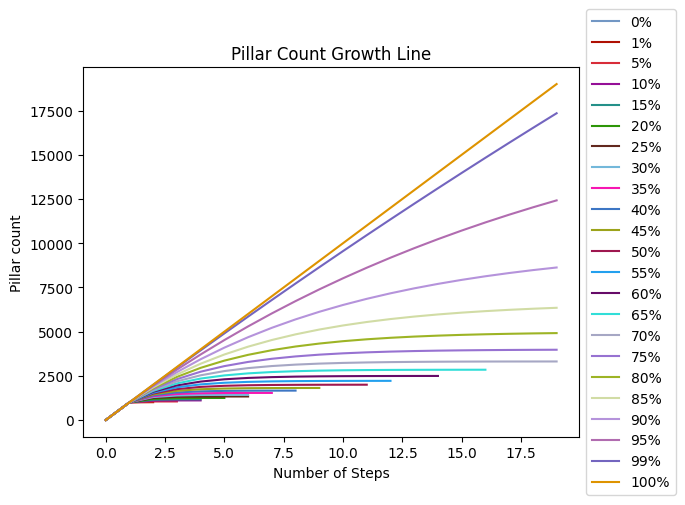

In [109]:
import matplotlib.pyplot as plt 
import numpy as np
from random import randint
  
max_y = np.array(list(range(0, 20)))
min_color = 1_950_750
max_color = 16_581_375

for i in range(len(reductions)):
    min_len = min(len(max_y), len(reductions[i]))
    x = np.array(reductions[i][:min_len])
    y = max_y[:min_len]
    color_int = randint(min_color, max_color)
    color = '#{:06x}'.format(color_int)
    plt.plot(y, x, label=str(percentages[i]) + '%', color=color) 
    
    plt.xlabel("Number of Steps") 
    plt.ylabel("Pillar count") 
    plt.title('Pillar Count Growth Line')
leg = plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show() 

### Results

At 0% reclaim, the wood is all deleted when you break down your first 1000 pillars, which causes the curve to stop at step 1, whereas at 100% reclaim it goes in a line approaching infinity by increments of 1000 pillars each time. The other curves slow more and more rapidly as the steps progress. 